In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
# Load of all .csv
df_ubereats_centro = pd.read_csv(r'csv/ubereats-pizza-centro.csv')
df_ubereats_alamos = pd.read_csv(r'csv/ubereats-pizza-alamos.csv')
df_ubereats_juriquilla = pd.read_csv(r'csv/ubereats-pizza-juriquilla.csv')
df_ubereats_milenio = pd.read_csv(r'csv/ubereats-pizza-milenio.csv')
df_ubereats_refugio = pd.read_csv(r'csv/ubereats-pizza-refugio.csv')
df_ubereats_balvanera = pd.read_csv(r'csv/ubereats-pizza-balvanera.csv')
df_ubereats_campanario = pd.read_csv(r'csv/ubereats-pizza-campanario.csv')
df_ubereats_cerritocolorado = pd.read_csv(r'csv/ubereats-pizza-cerritocolorado.csv')
df_ubereats_cimatario = pd.read_csv(r'csv/ubereats-pizza-cimatario.csv')
df_ubereats_el_pueblito = pd.read_csv(r'csv/ubereats-pizza-el-pueblito.csv')

df_rappi_centro = pd.read_csv(r'csv/rappi-pizza-centro.csv')
df_rappi_alamos = pd.read_csv(r'csv/rappi-pizza-alamos.csv')
df_rappi_juriquilla = pd.read_csv(r'csv/rappi-pizza-juriquilla.csv')
df_rappi_milenio = pd.read_csv(r'csv/rappi-pizza-milenio.csv')
df_rappi_refugio = pd.read_csv(r'csv/rappi-pizza-refugio.csv')
df_rappi_balvanera = pd.read_csv(r'csv/rappi-pizza-balvanera.csv')
df_rappi_campanario = pd.read_csv(r'csv/rappi-pizza-campanario.csv')
df_rappi_cerritocolorado = pd.read_csv(r'csv/rappi-pizza-cerritocolorado.csv')
df_rappi_cimatario = pd.read_csv(r'csv/rappi-pizza-cimatario.csv')
df_rappi_el_pueblito = pd.read_csv(r'csv/rappi-pizza-el-pueblito.csv')

frames = [
    df_ubereats_centro, 
    df_ubereats_alamos, 
    df_ubereats_juriquilla, 
    df_ubereats_milenio, 
    df_ubereats_refugio, 
    df_ubereats_balvanera, 
    df_ubereats_campanario, 
    df_ubereats_cerritocolorado, 
    df_ubereats_cimatario, 
    df_ubereats_el_pueblito, 
    df_rappi_centro, 
    df_rappi_alamos, 
    df_rappi_juriquilla, 
    df_rappi_milenio, 
    df_rappi_refugio, 
    df_rappi_balvanera, 
    df_rappi_campanario, 
    df_rappi_cerritocolorado, 
    df_rappi_cimatario, 
    df_rappi_el_pueblito]

df_QRO = pd.concat(frames, ignore_index=True)

In [3]:
df_QRO['price-food'] = df_QRO['price-food'].apply(lambda x: (float(x[3:] if x[0] == 'M' else x[1:]) if not isinstance(x, int) else float(x)) if not isinstance(x, float) else x)

In [4]:
#Se Obtienen unicamnte los productos que incluyen la palabra pizza y los nombres de los productos se convierten a minusculas
df_QROP = df_QRO[df_QRO['name-food'].str.contains("pizza", na=False, case=False)]
df_QROP = df_QROP.apply(lambda x: x.str.lower() if(x.dtype == "object") else x)
df_QROP.reset_index(drop=True, inplace=True)

In [5]:
#Se muestra el cambio 
df_QROP.loc[:,['name','rating','evals','name-food','price-food']]

,name,rating,evals,name-food,price-food
0,güero's pizza,4.7,(42),pizza especial americana - mediana,303.0
1,di vino,4.5,(64),pizza hawaiana,199.0
2,che-chelas,4.4,(47),pizza blanca,160.0
3,cheeseup pizza,NaN,NaN,pizza en pareja,189.0
4,lynchburg,NaN,NaN,pizza hawaiana,179.0
...,...,...,...,...,...
7790,estacion 19,NaN,NaN,pizza pompere,114.0
7791,trapani pizza,4.8,NaN,combo 2 pizzas grandes,268.0
7792,piu pizza,4.8,NaN,pizza salami,120.0
7793,mi piace pizza qro,NaN,NaN,pizza hawaiana,125.0


In [6]:
dframeTot = df_QROP.loc[:,['name','rating','evals']]
NumRestaurantes = dframeTot.drop_duplicates()
print('Total de pizzerias estudiadas: ')
print(NumRestaurantes['name'].count())

Total de pizzerias estudiadas: 
413


In [7]:
#Menu Tipico de las Pizzerias de Qro
MenuTipico = df_QROP.groupby('name-food').name.nunique().reset_index()
print(MenuTipico.loc[MenuTipico['name'] > 20])

                  name-food  name
156          pizza 4 quesos    30
332      pizza carnes frías    35
534   pizza de carnes frías    24
619      pizza de pepperoni    52
656          pizza de queso    21
996          pizza hawaiana   125
1043         pizza italiana    35
1122        pizza margarita    60
1129       pizza margherita    30
1206         pizza mexicana    89
1314        pizza pepperoni    71
1432         pizza ranchera    26
1612      pizza vegetariana    94


In [8]:
Pizza = ['4 Quesos','Carnes Frias','Pepperoni','Queso','Hawaiana','Italiana','Margherita','Mexicana','Ranchera','Vegetariana']
Comun = [30,59,123,21,125,35,90,89,26,94]

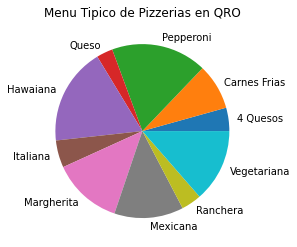

In [9]:
plt.pie(Comun, labels=Pizza)
plt.title('Menu Tipico de Pizzerias en QRO')
plt.show()

In [11]:
#Precio Promedio de una pizza en Qro
meanPizzaVal = df_QROP['price-food'].mean()
print(meanPizzaVal)

175.79896454265162


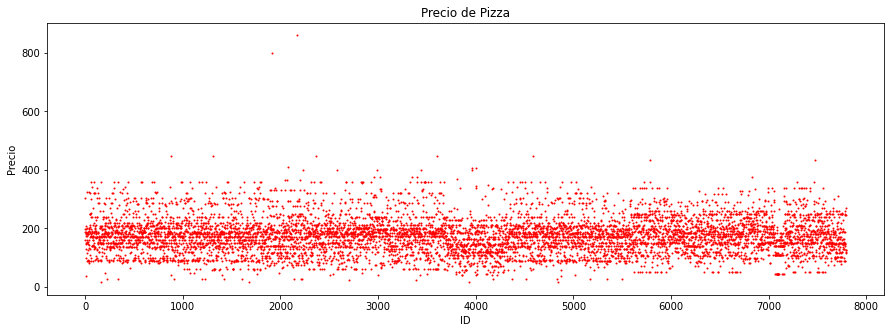

In [13]:
#Dispercion de Precios Pizza en QRO
plt.figure(figsize = (15, 5))
plt.title('Precio de Pizza')
plt.ylabel('Precio')
plt.xlabel('ID')
plt.plot(df_QROP['price-food'],'ro',ms=1)
plt.show()

In [14]:
# Se calcula la Varianza con numpy
numpy.std(df_QROP['price-food'])

61.962512044386536